In [1]:
from IPython.display import Image

# Adjust the width and height as needed
Image(url="https://myrx.in/image/articles/1120516864IMG.jpg", width=700, height=400)


<div style="background-color: #add8e6; padding: 20px; border-radius: 10px;">
  <h2 style="color: black;">Diabetes Dataset</h2>
  <p style="color: black;">
    <strong>Context:</strong><br>
    This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.
  </p>
  <p style="color: black;">
    <strong>Content:</strong><br>
    Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
  </p>
  <p style="color: black;">
    <strong>Objective:</strong><br>
    Develop a Machine Learning model to predict the risk of diabetes and identify key factors influencing diabetes onset, contributing to early intervention and prevention strategies. The goal is to predict the presence or absence of diabetes based on various health-related features.
  </p>
  <p style="color: black;">
    <strong>Here's a brief introduction to each of the dataset's variables:</strong>
  </p>
  <ul style="color: black;">
    <li><strong>Pregnancies:</strong> Number of times pregnant</li>
    <li><strong>Glucose:</strong> Plasma glucose concentration a 2 hours in an oral glucose tolerance test</li>
    <li><strong>BloodPressure:</strong> Diastolic blood pressure (mm Hg)</li>
    <li><strong>SkinThickness:</strong> Triceps skin fold thickness (mm)</li>
    <li><strong>Insulin:</strong> 2-Hour serum insulin (mu U/ml)</li>
    <li><strong>BMI:</strong> Body mass index (weight in kg/(height in m)^2)</li>
    <li><strong>DiabetesPedigreeFunction:</strong> Diabetes pedigree function</li>
    <li><strong>Age:</strong> Age (years)</li>
    <li><strong>Outcome:</strong> Class variable (0 or 1)</li>
  </ul>
</div>


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB  
from sklearn.ensemble import RandomForestClassifier  

import warnings
warnings.filterwarnings('ignore')


In [3]:
predict_copy=pd.read_csv("diabetes.csv")

In [4]:
predict_copy.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
predict_copy.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [6]:
predict_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
predict_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
predict_copy.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

<div style="background-color: #add8e6; padding: 20px; border-radius: 10px;">
  <p style="color: black;">
    As it is clear from the above output, the minimum value of several columns is 0, which is unlikely to occur in medical contexts. Therefore, we are going to use mean/median imputation depending on its distribution.
  </p>
  <p style="color: black;">
    <strong>Note that:</strong> Glucose, BloodPressure, SkinThickness, Insulin, BMI - From the scenario of the medical field, it is very clear that the values for these columns should not be zero and do not make any sense, thus indicating the presence of missing values.
  </p>
  <p style="color: black;">
    It's better to replace zeros with NAN since after that counting them would be easier and zeroes need to be replaced with suitable values.
  </p>
</div>


In [9]:
predict_copy["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

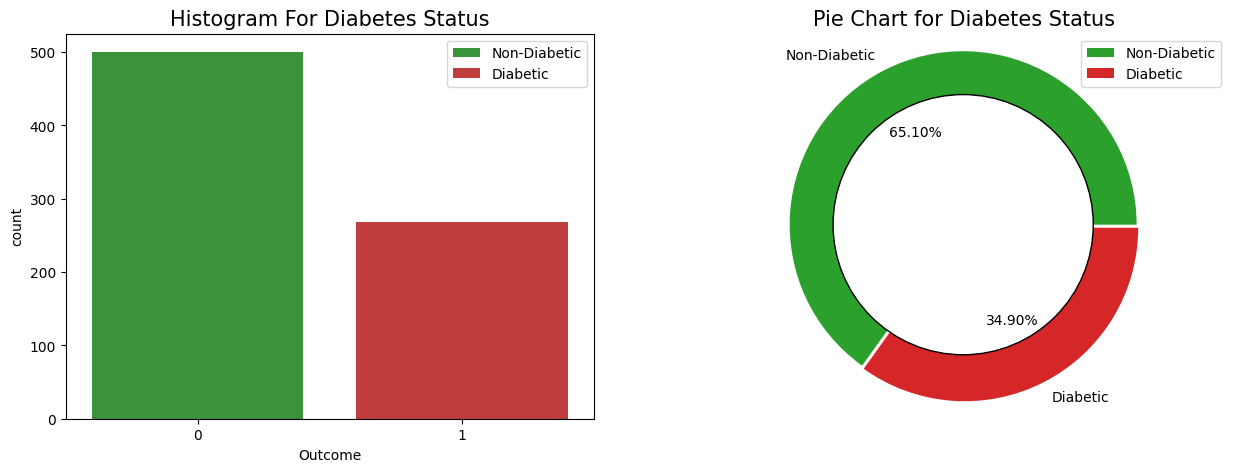

In [10]:
# Plotting For Diabetes Status
labels = ['Non-Diabetic', 'Diabetic']
colors = ['#2ca02c', '#d62728']  # light green  for Non-Diabetic, Red for Diabetic

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.countplot(data=predict_copy, x='Outcome', hue='Outcome', palette=colors, alpha=1)
plt.legend(labels)
plt.title('Histogram For Diabetes Status', size=15)

plt.subplot(1, 2, 2)  
y = predict_copy['Outcome'].value_counts()
explode = [0, 0.02]  
plt.pie(y, labels=labels, explode=explode, autopct='%.2f%%', colors=colors)
plt.axis('equal')
plt.legend(labels)
circle = plt.Circle(xy=(0, 0), radius=0.75, facecolor='white', edgecolor='black')
plt.gca().add_artist(circle)
plt.title('Pie Chart for Diabetes Status', size=15)
plt.show()


<div style="background-color: #add8e6; padding: 20px; border-radius: 10px;">
  <p style="color: black;">
    <strong>Histogram For Diabetes Status</strong>
  </p>
  <p style="color: black;">
    The histogram on the left displays the count of diabetic and non-diabetic patients. The x-axis represents the outcome (0 for non-diabetic, 1 for diabetic), while the y-axis represents the frequency of occurrences. It's evident from this plot that there are more non-diabetic patients (65%) compared to diabetic patients (35%). This imbalance in the dataset could potentially affect the performance of machine learning models, particularly those sensitive to class distribution.
  </p>
  <p style="color: black;">
    <strong>Pie Chart for Diabetes Status</strong>
  </p>
  <p style="color: black;">
    The pie chart on the right provides a visual representation of the distribution of diabetic and non-diabetic patients. Each slice of the pie represents a category (non-diabetic or diabetic), with the size of each slice proportional to the percentage of patients in that category. The data is imbalanced, with non-diabetic patients occupying a larger portion of the pie (65%) compared to diabetic patients (35%).
  </p>
</div>


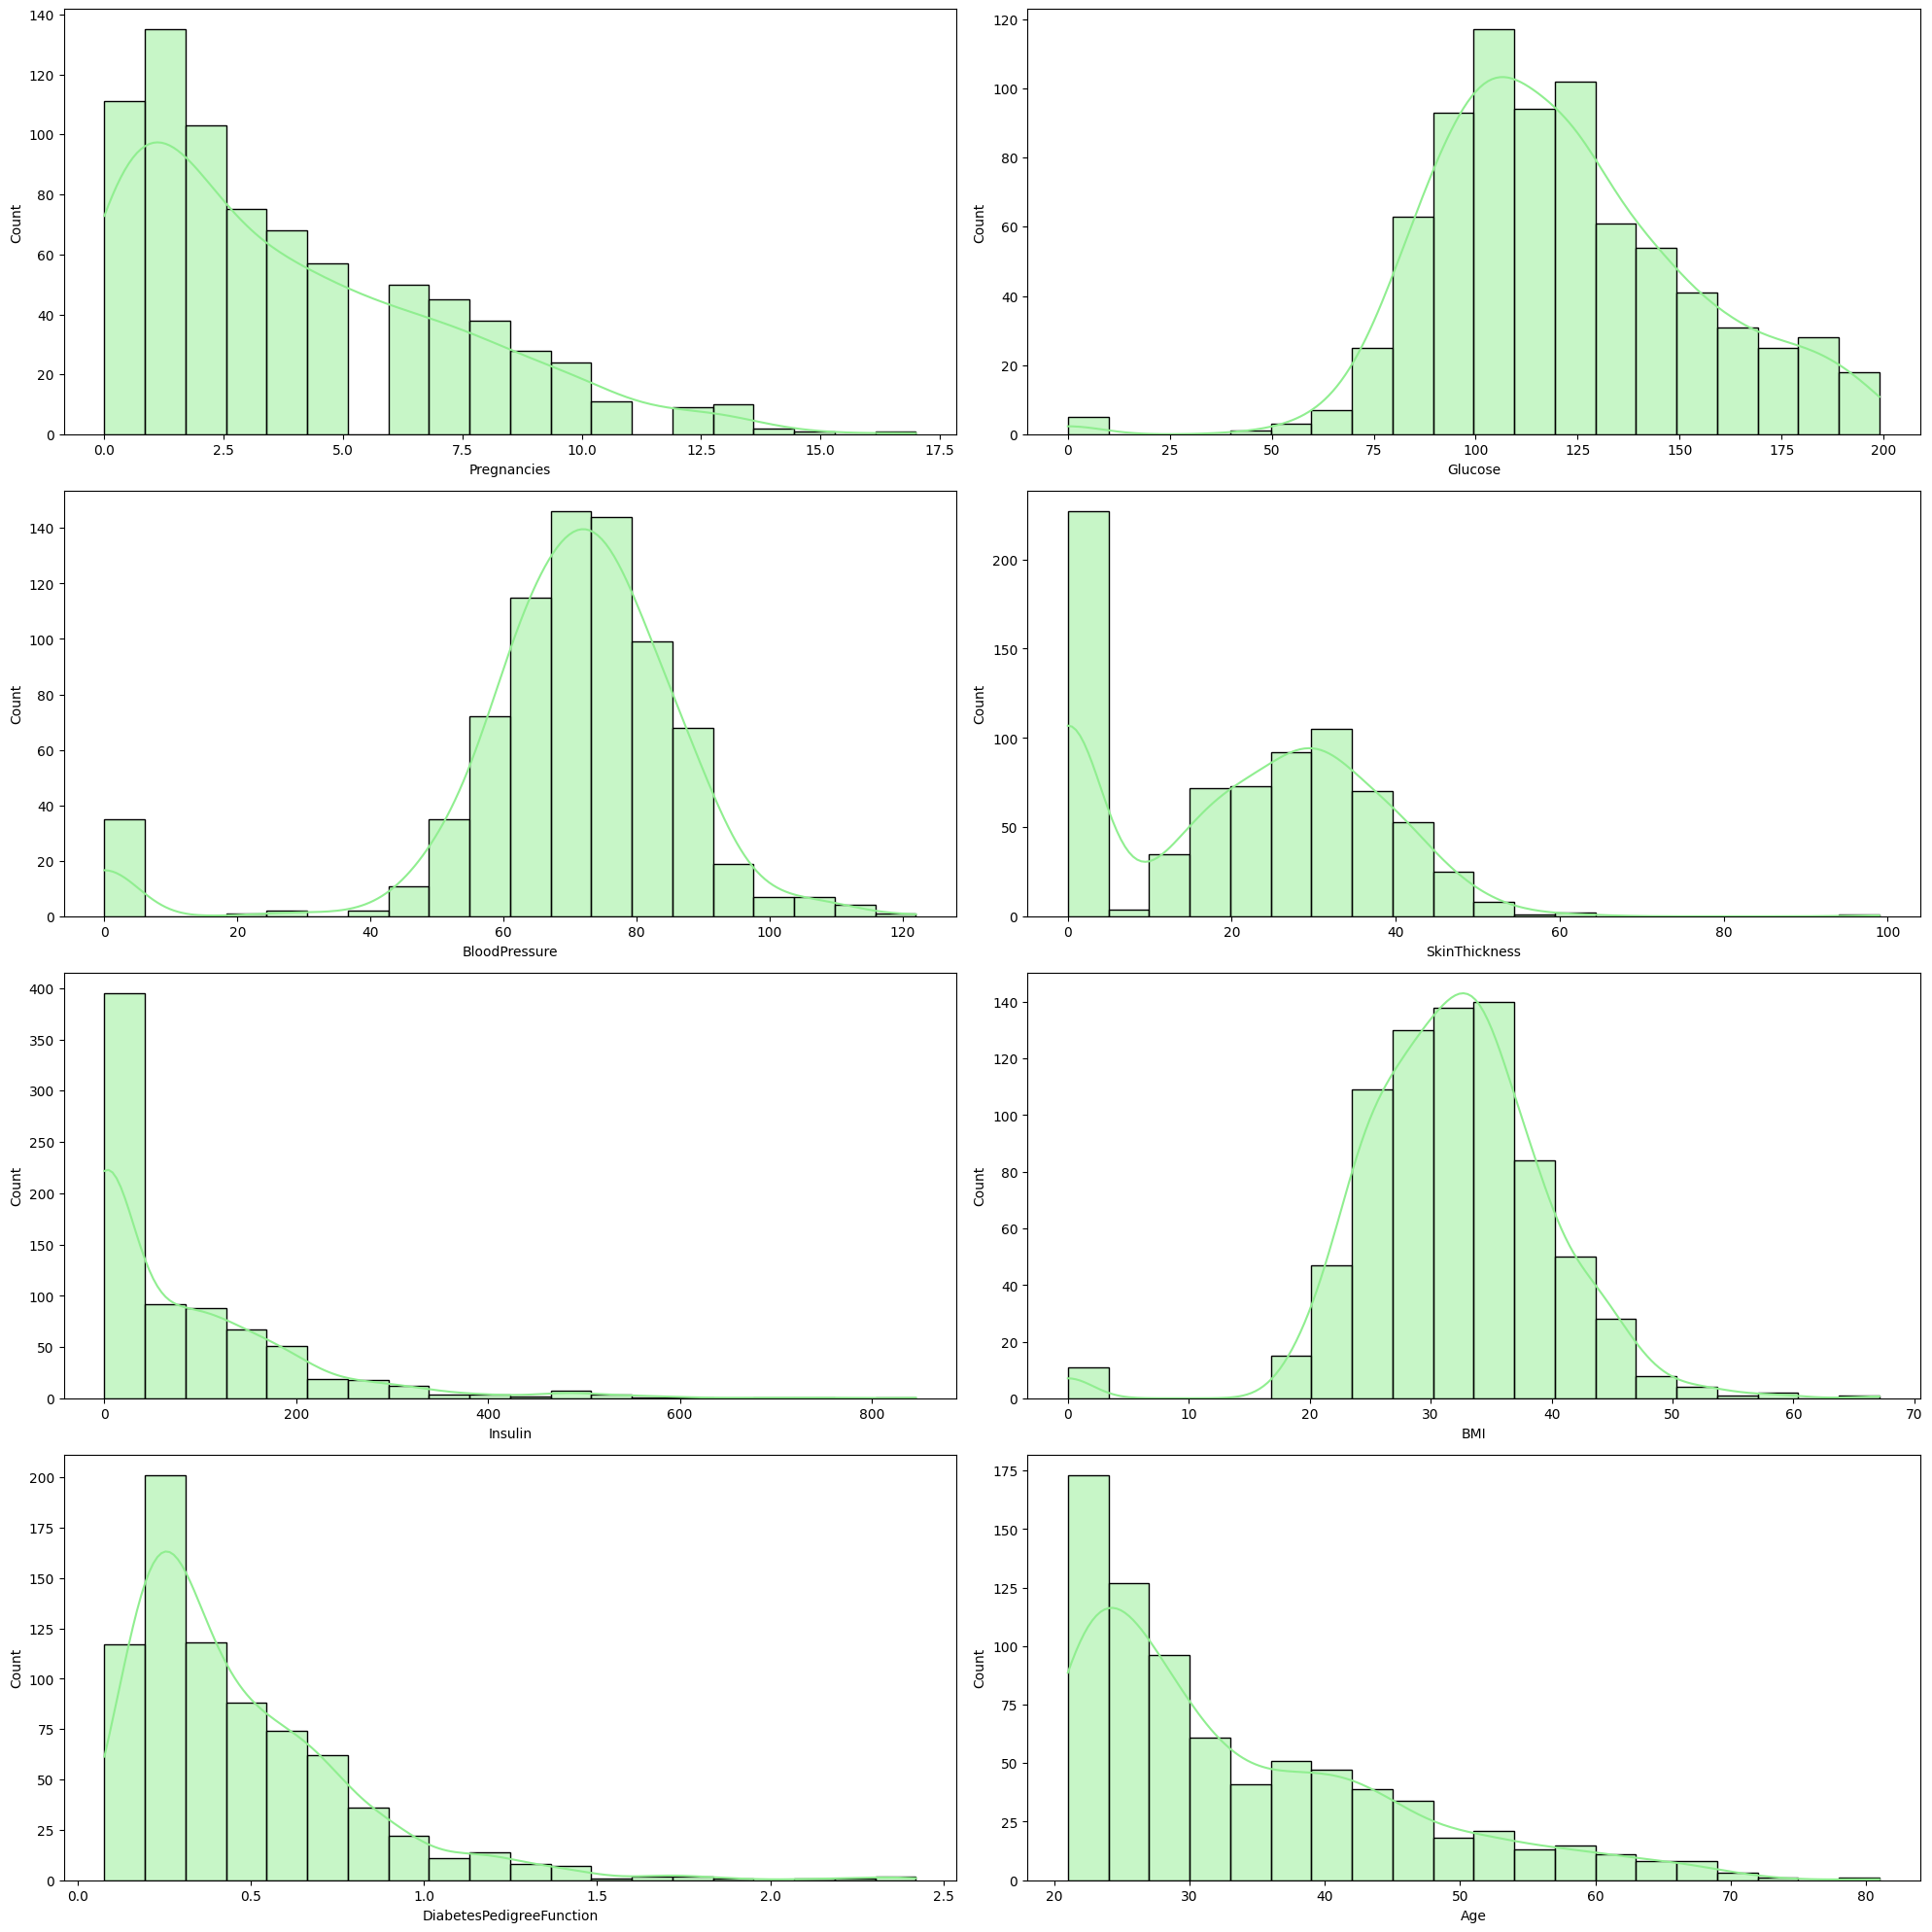

In [11]:
fig, ax = plt.subplots(4, 2, figsize=(20, 20))
sns.histplot(predict_copy.Pregnancies, bins=20, ax=ax[0, 0], color="lightgreen", kde=True)
sns.histplot(predict_copy.Glucose, bins=20, ax=ax[0, 1], color="lightgreen", kde=True)
sns.histplot(predict_copy.BloodPressure, bins=20, ax=ax[1, 0], color="lightgreen", kde=True)
sns.histplot(predict_copy.SkinThickness, bins=20, ax=ax[1, 1], color="lightgreen", kde=True)
sns.histplot(predict_copy.Insulin, bins=20, ax=ax[2, 0], color="lightgreen", kde=True)
sns.histplot(predict_copy.BMI, bins=20, ax=ax[2, 1], color="lightgreen", kde=True)
sns.histplot(predict_copy.DiabetesPedigreeFunction, bins=20, ax=ax[3, 0], color="lightgreen", kde=True)
sns.histplot(predict_copy.Age, bins=20, ax=ax[3, 1], color="lightgreen", kde=True)
plt.tight_layout()
plt.show()

<div style="background-color: #add8e6; padding: 20px; border-radius: 10px;">
  <p style="color: black;">
    <strong>Histograms for Various Features</strong>
  </p>
  <p style="color: black;">
    <strong>Insights into Data Characteristics:</strong> These visualizations offer insights into the spread and distribution of each feature, aiding in understanding the underlying data characteristics. By examining the histograms, one can identify the central tendency, variability, and potential outliers present in the dataset.
  </p>
  <p style="color: black;">
    As it is clearly visible that there are few plots where data is normally distributed and also right and left skewed distribution which possibly could be an indication of the presence of the outliers. Also, those outliers could be the data points which could be possible in the adverse health conditions so removing them from our dataset could lead to the loss of information.
  </p>
</div>


In [12]:
def plot_stacked_histograms(data, features, figsize=(15, 12)):
    num_features = len(features)
    num_rows = (num_features + 3) // 3  

    plt.figure(figsize=figsize)
    for i, feature in enumerate(features):
        row_num = (i // 3) + 1  
        col_num = (i % 3) + 1  

        plt.subplot(num_rows, 3, (row_num - 1) * 3 + col_num)
        
        # Change the color of outcome: 0 (non-diabetes) to lightgreen and 1 (diabetes) to red
        sns.histplot(data=data, x=feature, hue="Outcome", palette={0: "lightgreen", 1: "red"}, multiple="stack", kde=True)
        plt.title(f"{feature} by Outcome")  

    plt.tight_layout()
    plt.show()

We want to see the distribution of values on each columns with respect to the Outcome variable

We can do that by simply plotting the histogram in the form of a kernet density plot for both classes.

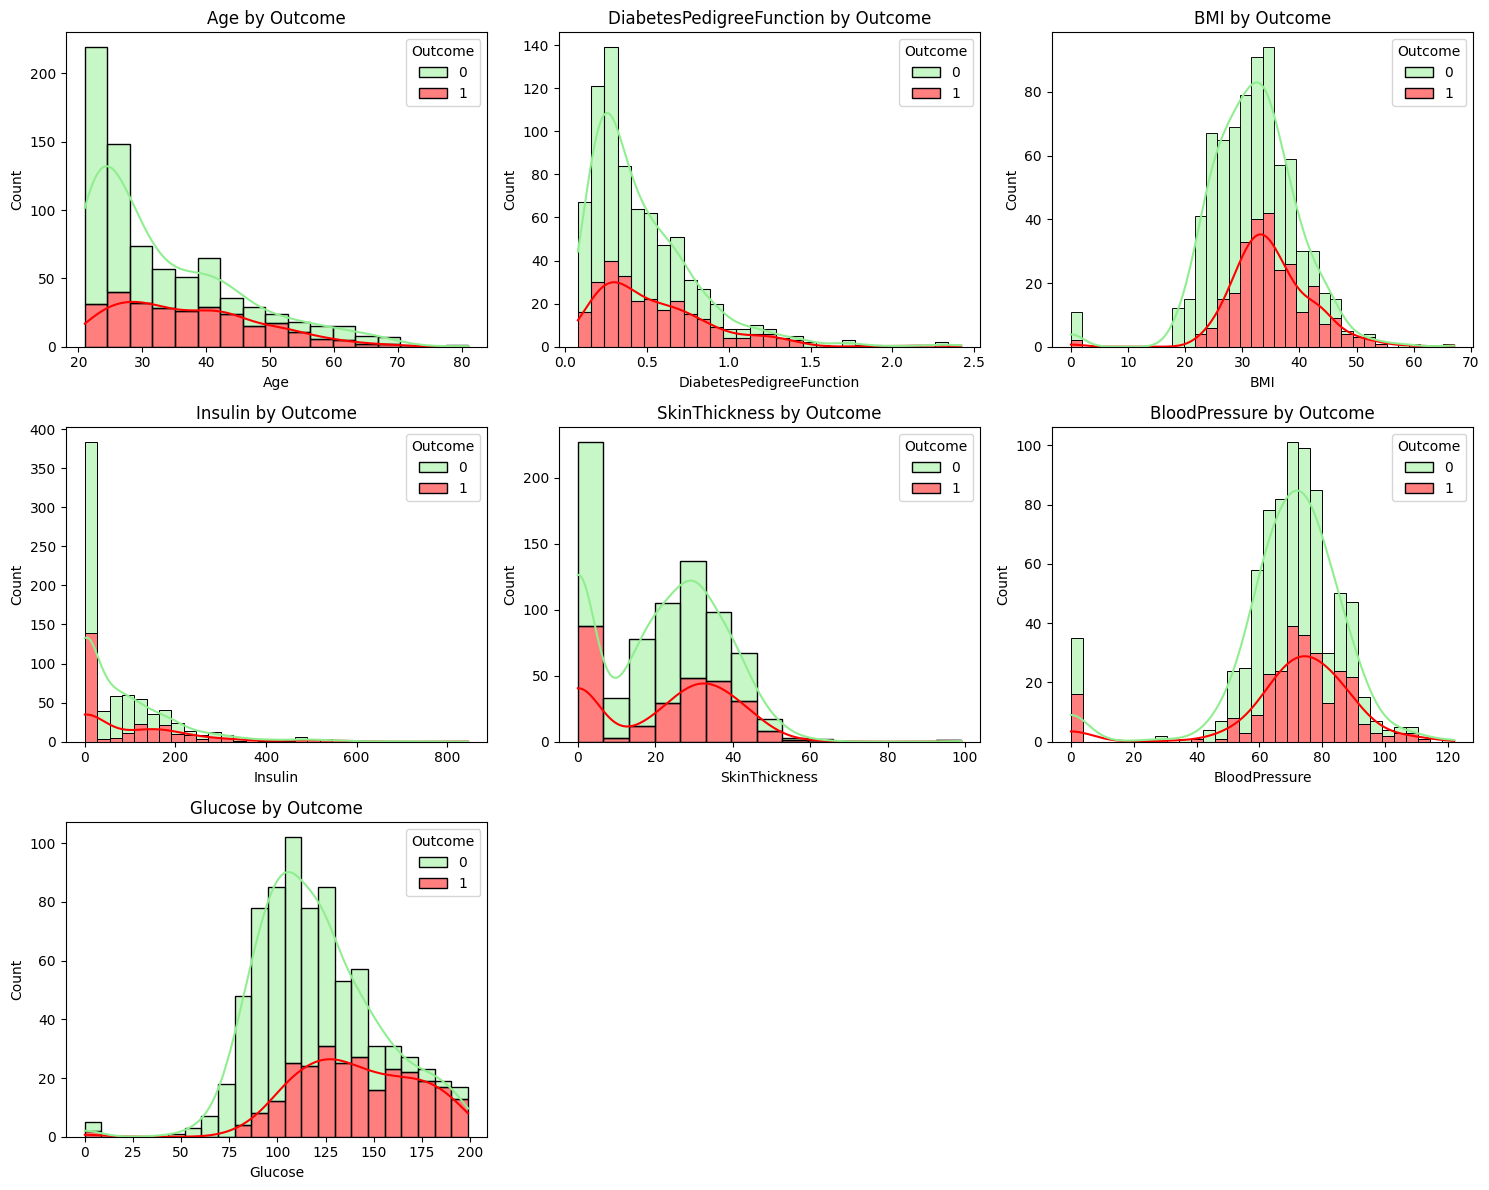

In [13]:
# Calling the function with our data and list of features
features = ['Age', 'DiabetesPedigreeFunction', 'BMI', 'Insulin', 
            'SkinThickness', 'BloodPressure', 'Glucose']
plot_stacked_histograms(predict_copy, features)

<div style="background-color: #add8e6; padding: 20px; border-radius: 10px;">
  <p style="color: black;">
    <strong>Stacked Histograms for Feature Comparison</strong>
  </p>
  <p style="color: black;">
    The function plots stacked histograms to visualize the distributions of different features for diabetic and non-diabetic patients.
  </p>
  <p style="color: black;">
    The histograms use different colors to represent the two outcome groups: non-diabetic patients are shown in light green, while diabetic patients are shown in red.
  </p>
  <p style="color: black;">
    From these stacked histograms, it is observed that how the distributions of various features differ between diabetic and non-diabetic patients. And these visualizations provide valuable insights into how different features contribute to the prediction of diabetes, which is essential for understanding the relationships between variables and informing subsequent analysis or modeling decisions.
  </p>
  <p style="color: black;">
    This visualization also aids in the feature selection process, which is crucial for building accurate predictive models.
  </p>
</div>


In [14]:
predict_copy_copy = predict_copy.copy(deep=True)
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
predict_copy_copy[columns_to_replace] = predict_copy_copy[columns_to_replace].replace(0, np.NaN)

print(predict_copy_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


<div style="background-color: #add8e6; padding: 20px; border-radius: 10px;">
  <p style="color: black;">
    <strong>Replacing zero values in certain health-related columns with NaNs in a DataFrame named predict_copy. Here's the insight breakdown:</strong>
  </p>
  <ul style="color: black;">
    <li><strong>Data Preprocessing:</strong> Zero values in health-related columns are replaced with NaNs.</li>
    <li><strong>Columns Processed:</strong> 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', and 'BMI' are targeted.</li>
    <li><strong>Purpose:</strong> Ensures data quality by handling missing or invalid data.</li>
    <li><strong>Verification:</strong> Number of missing values in each column is printed for transparency and further investigation.</li>
  </ul>
</div>


In [15]:
predict_copy.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

<div style="background-color: #add8e6; padding: 20px; border-radius: 10px;">
  <p style="color: black;">
    <strong>Summary Statistics:</strong> Provides key statistical measures for numerical columns.
    <br><strong>Data Distribution:</strong> Insights into central tendency, spread, and quartiles.
    <br><strong>Identification of Outliers:</strong> Comparison of min/max values and quartiles helps detect outliers.
    <br><strong>Data Completeness:</strong> Count of non-null values per column indicates data completeness.
    <br><strong>Data Range:</strong> Understanding range aids in setting preprocessing steps and model parameters.
  </p>
  <p style="color: black;">
    The table above summarizes the common statistics stuff we can compute from the data.
    <br>By observing the row count, we can confirm that there is no missing data.
    <br>However, looking at the minimum row, we find zero values in columns like Glucose, BloodPressure, SkinThickness, and BMI. This is unexpected in a medical scenario; encountering someone with zero values for these attributes would be implausible.
  </p>
</div>


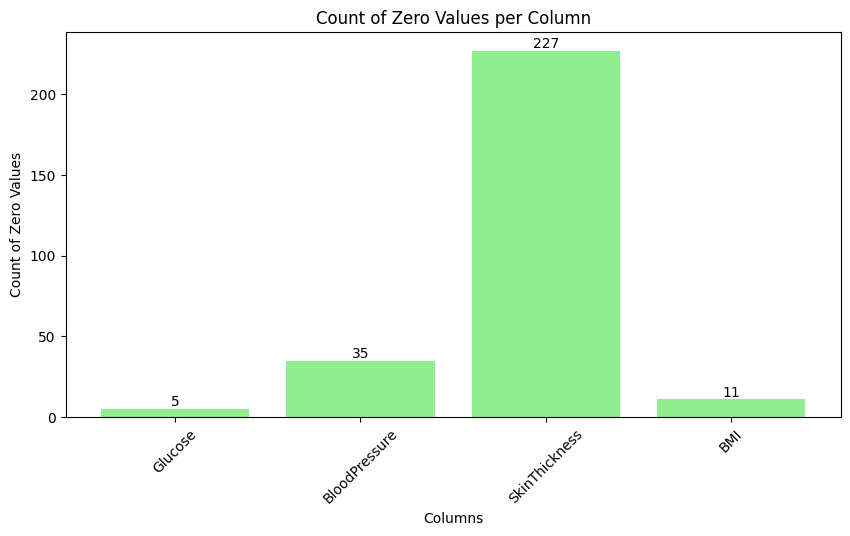

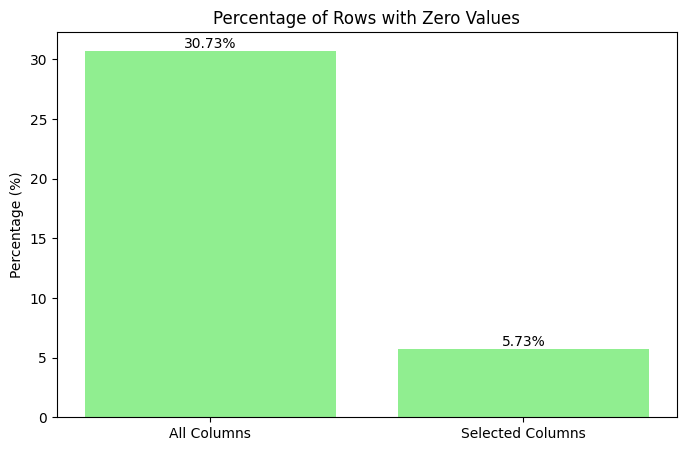

---Count zero values per column---
Glucose: 5
BloodPressure: 35
SkinThickness: 227
BMI: 11

---Rows with zero values in %---
% of rows with zero values in all columns listed above: 30.729166666666668
% of rows with zero values in columns 'Glucose', 'BloodPressure' and 'BMI': 5.729166666666666


In [16]:
# Count zero values per column
zero_counts = []
columns = ["Glucose", "BloodPressure", "SkinThickness", "BMI"]
for col in columns:
    zero_counts.append(predict_copy[col].value_counts()[0])

# Plot the counts
plt.figure(figsize=(10, 5))
bars = plt.bar(columns, zero_counts, color='lightgreen')  # Change color to light green
plt.title('Count of Zero Values per Column')
plt.xlabel('Columns')
plt.ylabel('Count of Zero Values')
plt.xticks(rotation=45)

# Annotate the bars with count values
for bar, count in zip(bars, zero_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom')

plt.show()

# Calculate the percentage of rows with zero values
total_rows = predict_copy.shape[0]
zero_rows = predict_copy[(predict_copy["Glucose"]==0) | (predict_copy["BloodPressure"]==0) | 
                         (predict_copy["BMI"]==0) | (predict_copy["SkinThickness"]==0)].shape[0]
percent_all_columns = (zero_rows / total_rows) * 100

zero_rows_selected = predict_copy[(predict_copy["Glucose"]==0) | (predict_copy["BloodPressure"]==0) | 
                                  (predict_copy["BMI"]==0)].shape[0]
percent_selected_columns = (zero_rows_selected / total_rows) * 100

# Plot the percentages
plt.figure(figsize=(8, 5))
bars = plt.bar(['All Columns', 'Selected Columns'], [percent_all_columns, percent_selected_columns], color='lightgreen')
plt.title('Percentage of Rows with Zero Values')
plt.ylabel('Percentage (%)')

# Annotate the bars with percentage values
for bar, percent in zip(bars, [percent_all_columns, percent_selected_columns]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), "{:.2f}%".format(percent),
             ha='center', va='bottom')

plt.show()

# Print the text
print("---Count zero values per column---")
for col, count in zip(columns, zero_counts):
    print("{}: {}".format(col, count))

print("\n---Rows with zero values in %---")
print("% of rows with zero values in all columns listed above:", percent_all_columns)
print("% of rows with zero values in columns 'Glucose', 'BloodPressure' and 'BMI':", percent_selected_columns)

**We can remove rows with zero values in columns Glucose, BloodPressure or BMI since these rows are just around 6% of the data. While, we can impute values for SkinThickness because we don't want 30% of our data to be thrown away.**

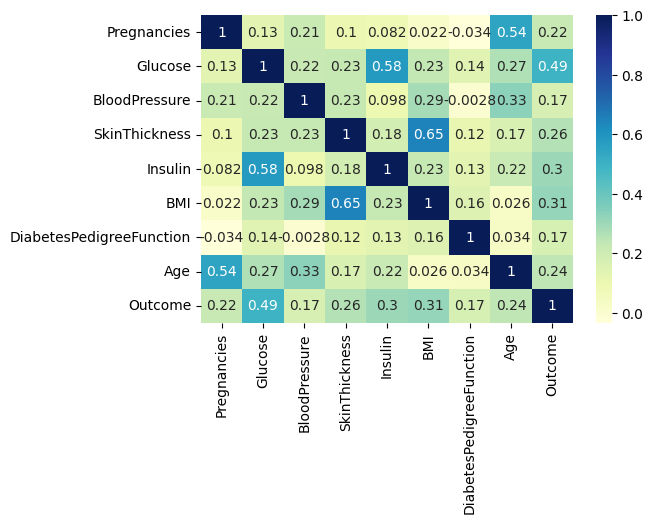

In [17]:
plt.figure(figsize=(6,4))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(predict_copy_copy.corr(), annot=True,cmap ='YlGnBu')  # seaborn has very simple solution for heatmap

<div style="background-color: #add8e6; padding: 20px; border-radius: 10px;">
  <p style="color: black;">
    Glucose has the highest correlation with our target variable Outcome, followed by BMI.
    <br>While, BloodPressure and SkinThickness have the lowest correlation.
  </p>
</div>


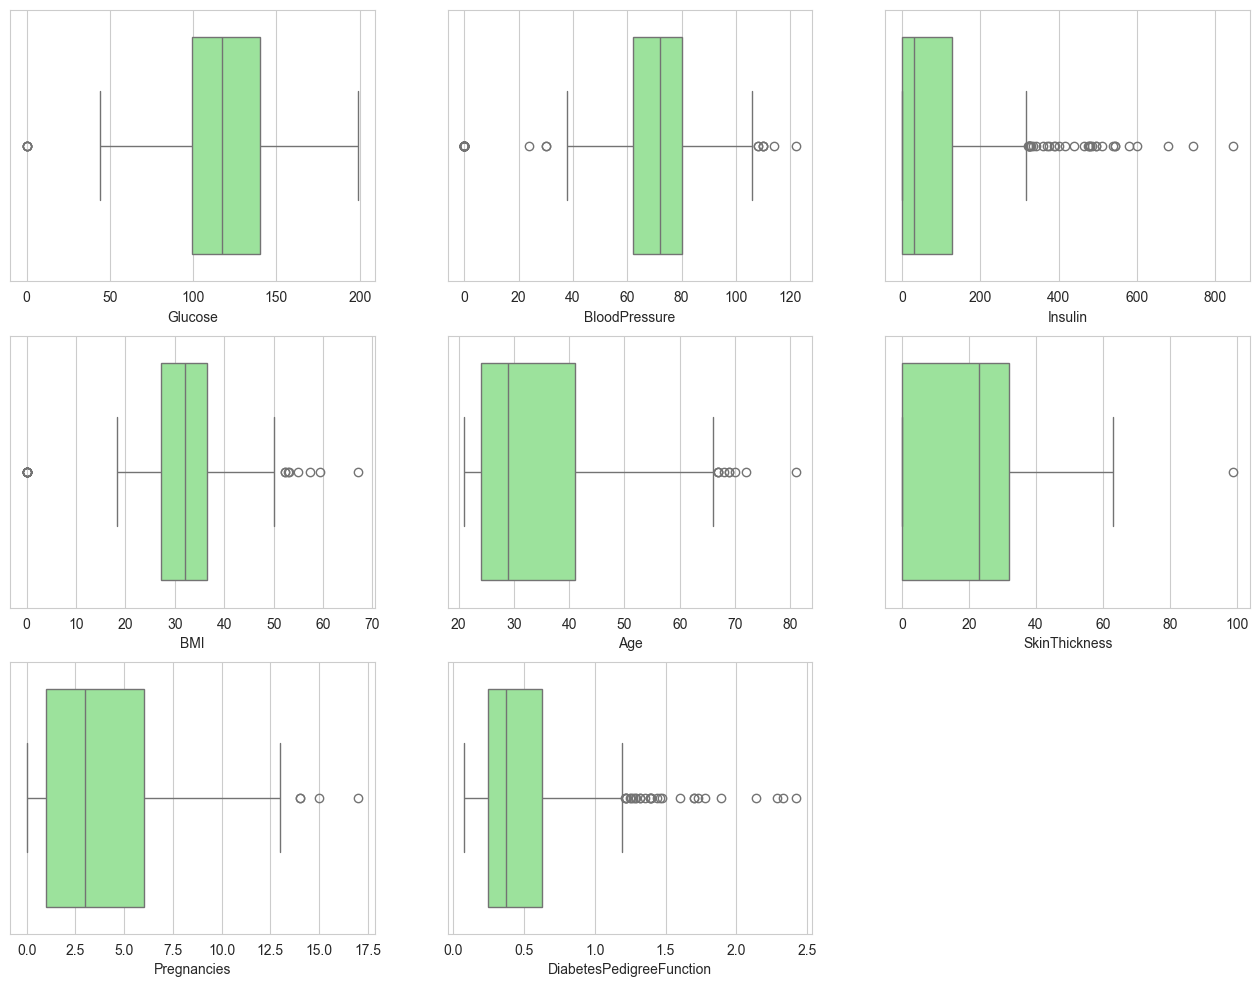

In [18]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=predict_copy, color='lightgreen')
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=predict_copy, color='lightgreen')
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=predict_copy, color='lightgreen')
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=predict_copy, color='lightgreen')
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=predict_copy, color='lightgreen')
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=predict_copy, color='lightgreen')
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=predict_copy, color='lightgreen')
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=predict_copy, color='lightgreen')
plt.show()


<div style="background-color: #add8e6; padding: 20px; border-radius: 10px;">
  <p style="color: black;">
    There is the presence of outliers but in the medical field , those data points could be the cases in adverse conditions so here, the outliers could be sensible data points within the context of the features being examined, and we choose to retain these outliers.<br>
    <br>Retaining these outliers may contain valuable information that could contribute to the robustness and generalization of our classification model.<br>
    <br>By adopting this approach, we aim to develop a classification model that leverages the full range of information present in our dataset, including the outliers, to achieve accurate and generalizable predictions of diabetes status.
  </p>
</div>


<Figure size 640x480 with 0 Axes>

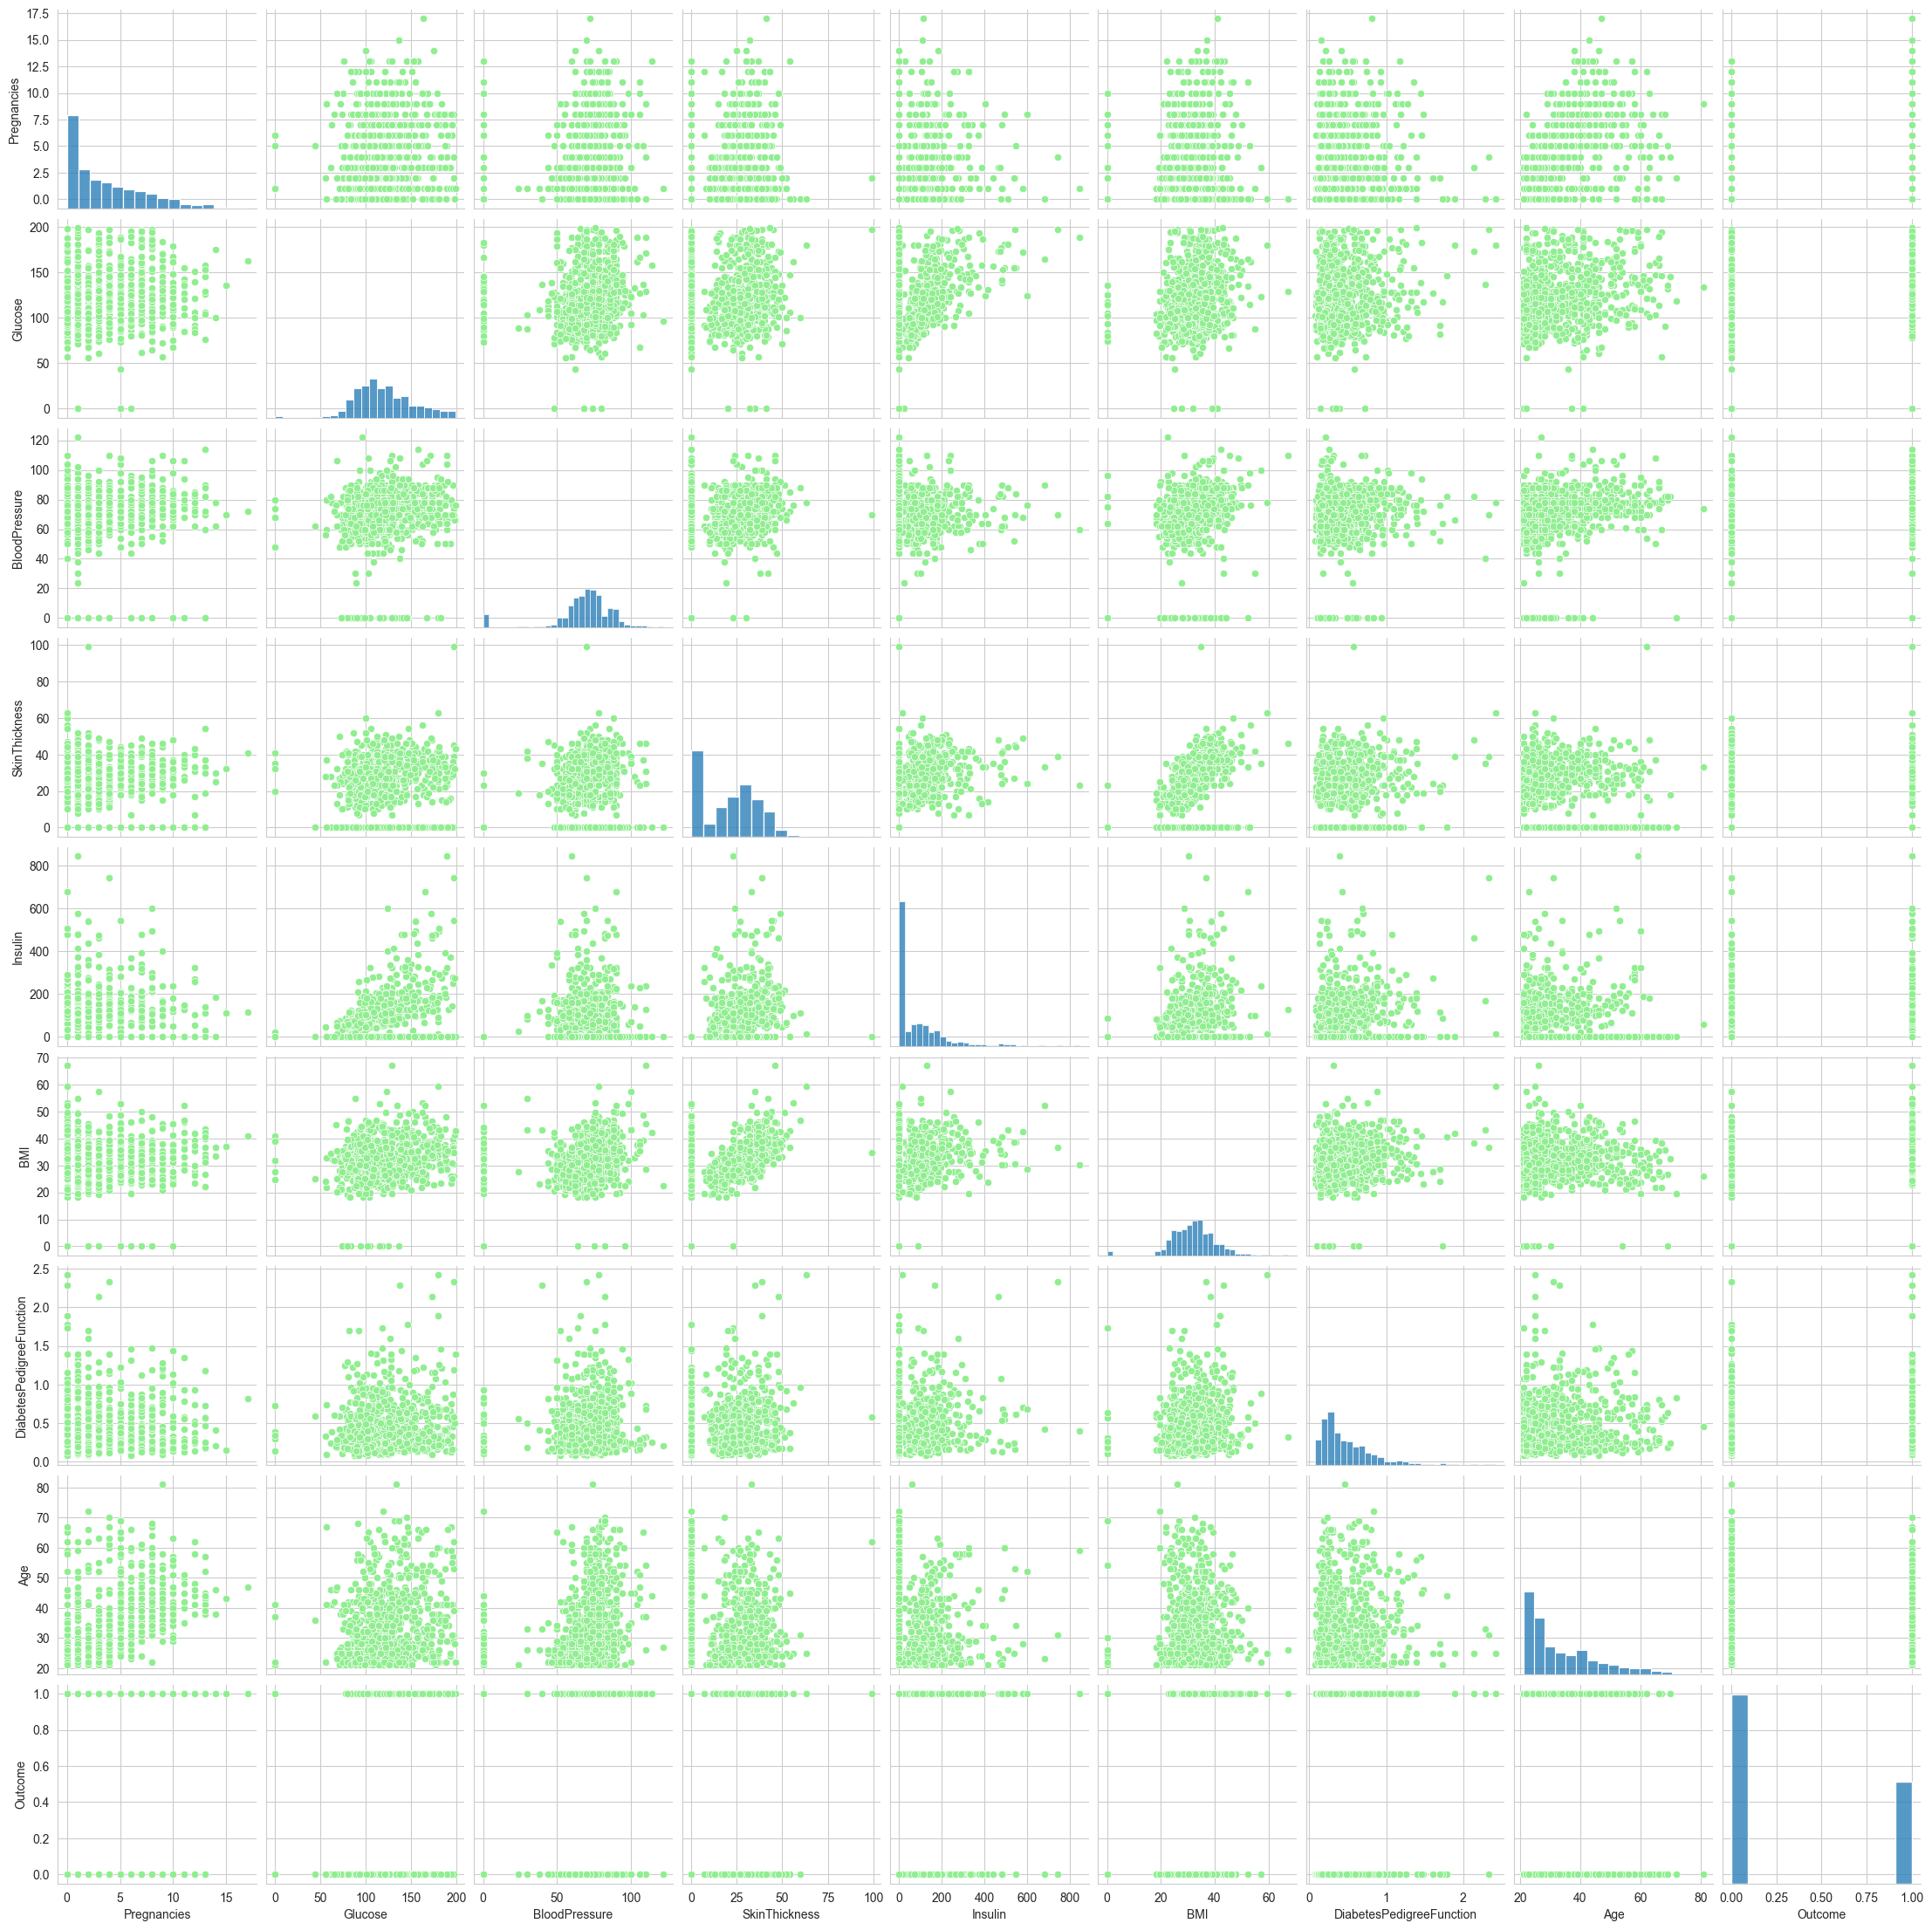

In [19]:
# Set the background color for the plots
plt.figure(facecolor='lightblue')

# Create the pairplot with light green elements
sns.pairplot(predict_copy, plot_kws={'color': 'lightgreen'})

# Show the plot
plt.show()

<div style="background-color: #add8e6; padding: 20px; border-radius: 10px;">
  <p style="color: black;">
    The above pairplot clearly helps in visualizing pairwise relationships between variables in the dataset and also it helps in identifying patterns, trends, and correlations between the variables. Insights can be gained into how variables interact and their influence on the target variable (diabetes status).
  </p>
  <p style="color: black;">
    As already plotted the heatmap which shows the degree of correlation between the predictor variables, and pairplot shows us the variables' interaction and their influence on the target variable (diabetes status).
  </p>
</div>


[1 0]


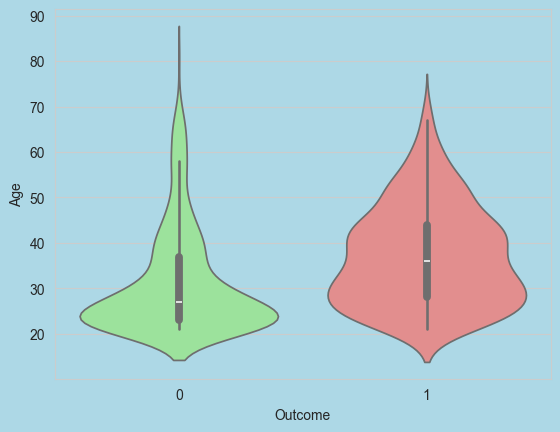

In [20]:
# Check the unique values in the 'Outcome' column to ensure correct keys
print(predict_copy['Outcome'].unique())

# Assuming 'Outcome' contains strings '0' and '1'
# Set the background color
plt.figure(facecolor='lightblue')

# Create the violin plot with specific colors for each 'Outcome'
sns.violinplot(x='Outcome', y='Age', data=predict_copy, palette={'0': 'lightgreen', '1': 'lightcoral'})

# Adjust the background color of the plot area
plt.gca().set_facecolor('lightblue')

# Show the plot
plt.show()

[1 0]


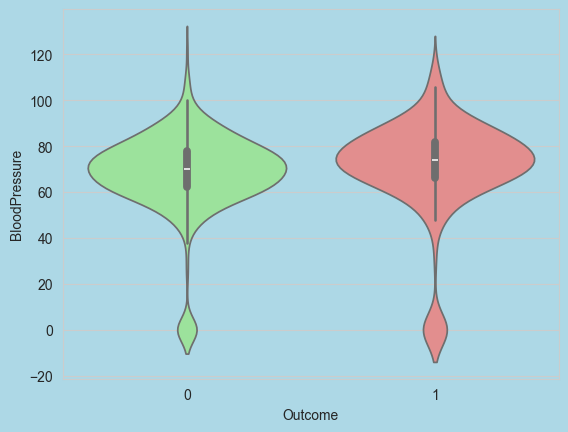

In [21]:
# Check the unique values in the 'Outcome' column to ensure correct keys
print(predict_copy['Outcome'].unique())

# Assuming 'Outcome' contains strings '0' and '1'
# Set the background color
plt.figure(facecolor='lightblue')

# Create the violin plot with specific colors for each 'Outcome'
sns.violinplot(x='Outcome', y='BloodPressure', data=predict_copy, palette={'0': 'lightgreen', '1': 'lightcoral'})

# Adjust the background color of the plot area
plt.gca().set_facecolor('lightblue')

# Show the plot
plt.show()

[1 0]


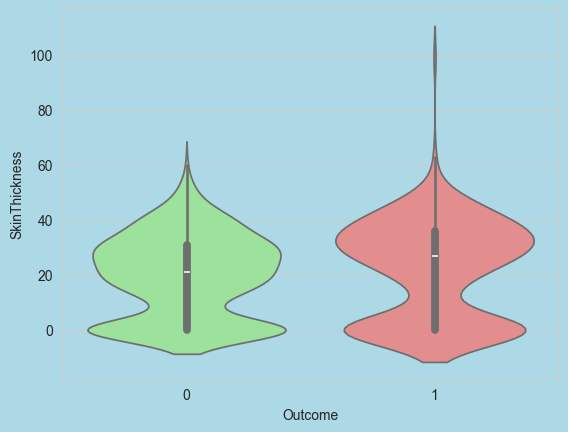

In [22]:
# Check the unique values in the 'Outcome' column to ensure correct keys
print(predict_copy['Outcome'].unique())

# Assuming 'Outcome' contains strings '0' and '1'
# Set the background color
plt.figure(facecolor='lightblue')

# Create the violin plot with specific colors for each 'Outcome'
sns.violinplot(x='Outcome', y='SkinThickness', data=predict_copy, palette={'0': 'lightgreen', '1': 'lightcoral'})

# Adjust the background color of the plot area
plt.gca().set_facecolor('lightblue')

# Show the plot
plt.show()

[1 0]


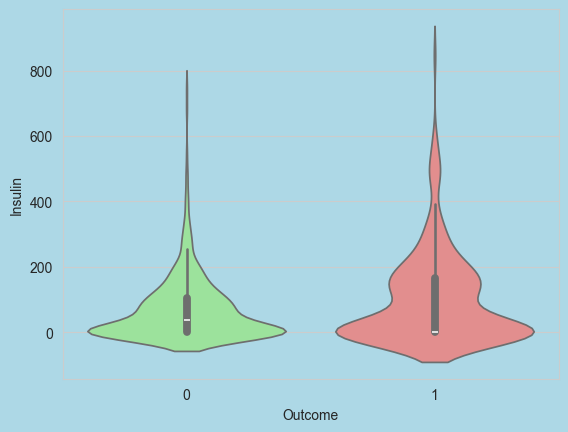

In [23]:
# Check the unique values in the 'Outcome' column to ensure correct keys
print(predict_copy['Outcome'].unique())

# Assuming 'Outcome' contains strings '0' and '1'
# Set the background color
plt.figure(facecolor='lightblue')

# Create the violin plot with specific colors for each 'Outcome'
sns.violinplot(x='Outcome', y='Insulin', data=predict_copy, palette={'0': 'lightgreen', '1': 'lightcoral'})

# Adjust the background color of the plot area
plt.gca().set_facecolor('lightblue')

# Show the plot
plt.show()

[1 0]


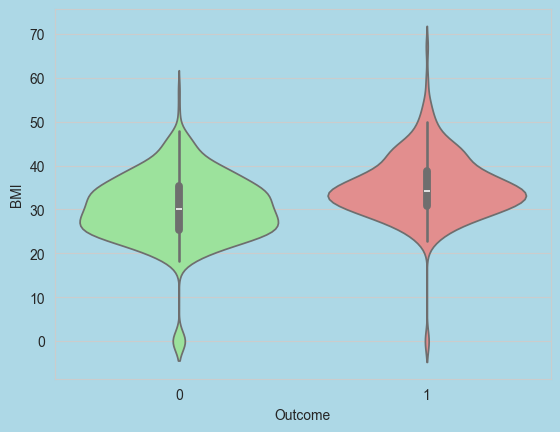

In [24]:
# Check the unique values in the 'Outcome' column to ensure correct keys
print(predict_copy['Outcome'].unique())

# Assuming 'Outcome' contains strings '0' and '1'
# Set the background color
plt.figure(facecolor='lightblue')

# Create the violin plot with specific colors for each 'Outcome'
sns.violinplot(x='Outcome', y='BMI', data=predict_copy, palette={'0': 'lightgreen', '1': 'lightcoral'})

# Adjust the background color of the plot area
plt.gca().set_facecolor('lightblue')

# Show the plot
plt.show()

<div style="background-color: #add8e6; padding: 20px; border-radius: 10px;">
  <p style="color: black;">
    <strong>Violin Plot Insights:</strong>
    <br>The violin plot effectively compares the distribution of a continuous variable (such as skin thickness) between different outcomes (non-diabetic vs. diabetic).<br>
    <br>By observing the violin plot, if there are noticeable differences in the width, shape, or overall distribution of the violin between the two outcomes for a specific variable (e.g., SkinThickness), it indicates that this variable plays a significant role in distinguishing between the outcomes.<br>
    <br>Therefore, stating that "the variable (SkinThickness) indicates much differences in the distribution of the variable between outcomes" is an accurate interpretation of the violin plot.
  </p>
</div>


[1 0]
int64


<Figure size 640x480 with 0 Axes>

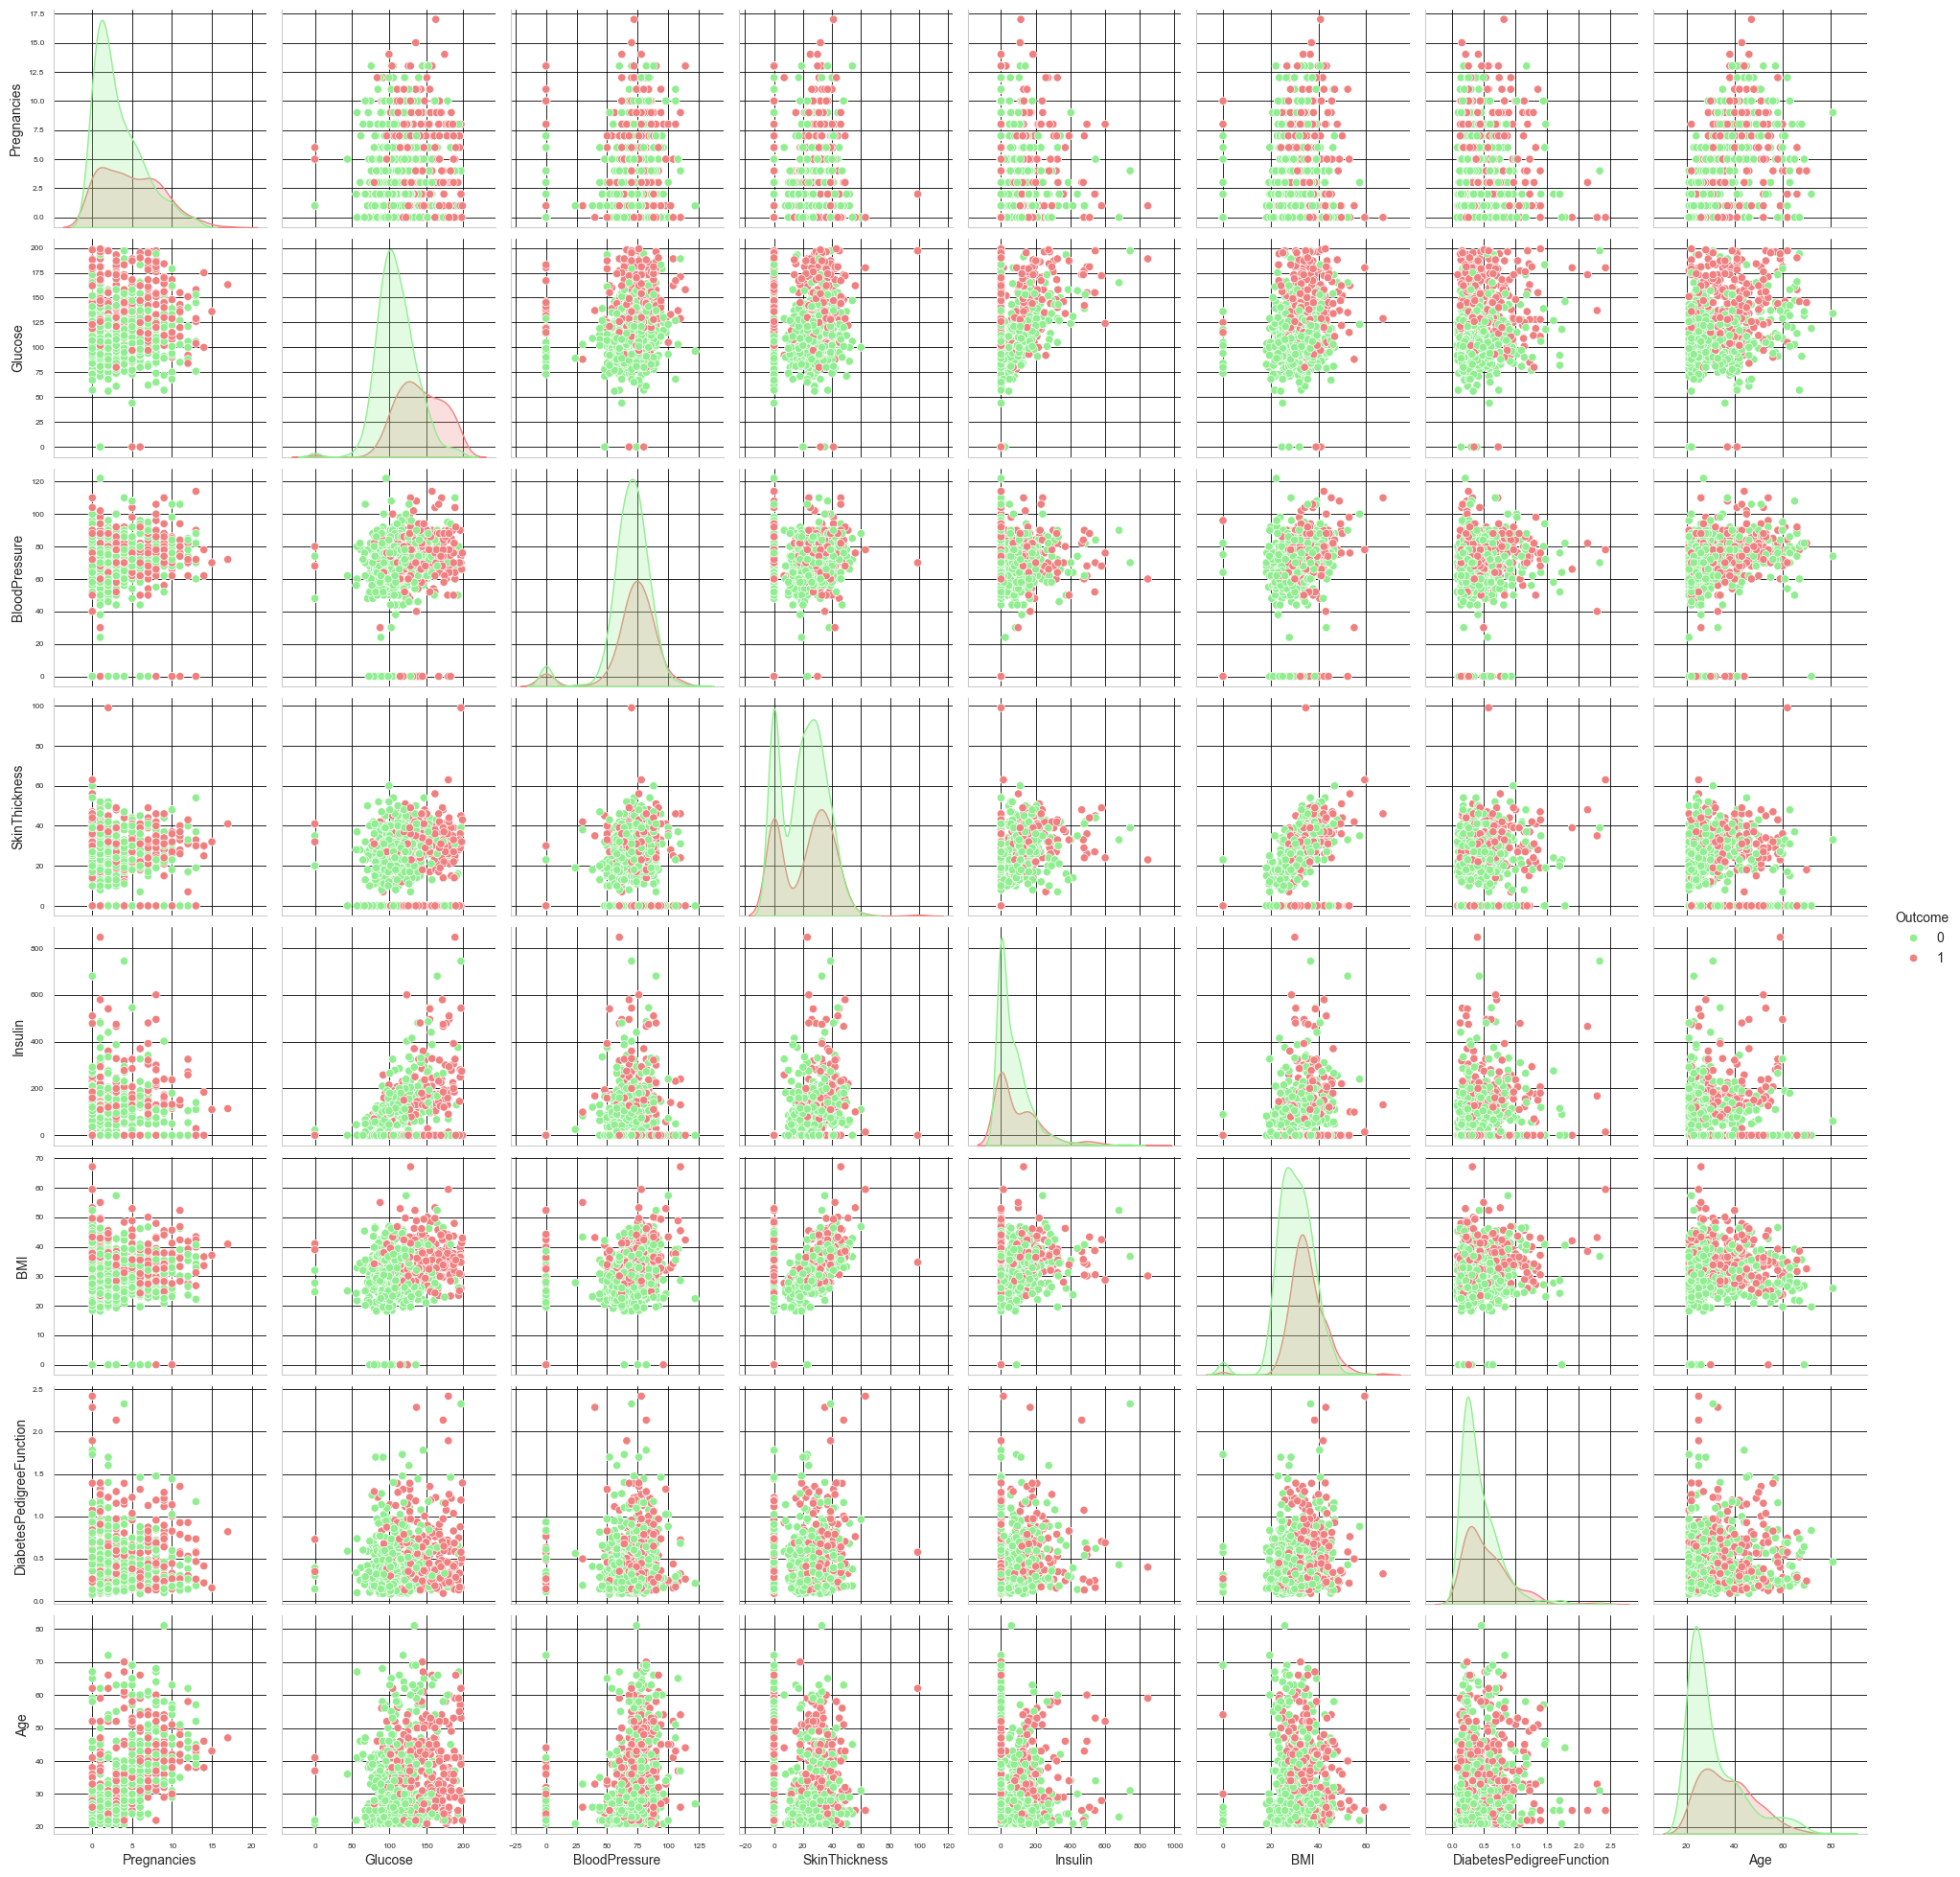

In [25]:
# Check the unique values and their types in the 'Outcome' column
print(predict_copy['Outcome'].unique())
print(predict_copy['Outcome'].dtype)

# Assuming 'Outcome' contains integers 0 and 1
# Set the background color of the entire figure to white
plt.figure(facecolor='white')

# Create the pairplot with specific colors for each 'Outcome'
g = sns.pairplot(predict_copy, hue='Outcome', palette={0: 'lightgreen', 1: 'lightcoral'})

# Set the background color for all subplots to light blue and adjust grid lines
for ax in g.axes.flatten():
    ax.set_facecolor('white')
    ax.grid(True, which='both', color='black', linewidth=0.6)  # Make grid lines bold
    ax.tick_params(axis='both', which='major', labelsize=6)   # Adjust tick label size if needed

# Show the plot
plt.show()

**Preparing the Data for modelling**

 -- <u>Handling zero values</u>
 
    **Remove rows**
   
     As stated above, we can remove rows with zero values in columns Glucose,      BloodPressure and BMI.
     As stated above, we can remove rows with zero values in columns Glucose, BloodPressure and BMI.

In [26]:
### Create new dataframe wherein the unwanted rows are not included
df_new = predict_copy[ (predict_copy["Glucose"]!=0) & (predict_copy["BloodPressure"]!=0) & (predict_copy["BMI"]!=0) ]

### Check the new dataframe
print("Size of dataframe:", df_new.shape)
df_new.head()

Size of dataframe: (724, 9)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [27]:
### Check minimum values of the new dataframe
df_new.describe().loc["min"]

Pregnancies                  0.000
Glucose                     44.000
BloodPressure               24.000
SkinThickness                0.000
Insulin                      0.000
BMI                         18.200
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
Name: min, dtype: float64

**Impute**

__Since there are many rows with zero values in SkinThickness, we will use Linear Regression to change those values to non-zeroes.__

In [28]:
### Separate rows that have zero value in SkinThickness from the rows that have value > 0
df_impute = df_new[df_new["SkinThickness"]!=0]
df_0 = df_new[df_new["SkinThickness"]==0]

### Use Linear Regression for imputation
## Instantiate the Linear Regression Algorithm
linreg = LinearRegression()

## Fit the dataframe with SkinThickness > 0 on linreg
linreg.fit(df_impute.drop(["SkinThickness", "Outcome"], axis=1), df_impute["SkinThickness"])

## Get the new values of SkinThickness
df_0["SkinThickness"] = linreg.predict(df_0.drop(["SkinThickness","Outcome"], axis=1))

### Merge the imputed datas, then check
df_impute = df_impute.append(df_0)
df_impute.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   724.000000  724.000000     724.000000     724.000000  724.000000   
mean      3.866022  121.882597      72.400552      29.024005   84.494475   
std       3.362803   30.750030      12.379870       9.683955  117.016513   
min       0.000000   44.000000      24.000000       7.000000    0.000000   
25%       1.000000   99.750000      64.000000      22.014105    0.000000   
50%       3.000000  117.000000      72.000000      29.000000   48.000000   
75%       6.000000  142.000000      80.000000      35.004675  130.500000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  724.000000                724.000000  724.000000  724.000000  
mean    32.467127                  0.474765   33.350829    0.343923  
std      6.888941                  0.332315   11.765393    0.475344  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.245000   24.000000    0.000000  
50%     32.400000                  0.379000   29.000000    0.000000  
75%     36.600000                  0.627500   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

<div style="background-color: lightblue; color: black; padding: 10px; border-radius: 5px;">
    <ul>
        <li>Removed rows with zero values in Glucose, BloodPressure, and BMI for data quality.</li>
        <li>Created a new dataframe (<code>df_new</code>) without these zero values.</li>
        <li>Used Linear Regression to impute missing SkinThickness values.</li>
        <li>Trained the model on non-zero SkinThickness data and imputed the zero values.</li>
        <li>Merged imputed data back for a complete dataset.</li>
        <li>Noted zero insulin levels' serious health implications, requiring medical attention.</li>
    </ul>
</div>


**It's important to note that while zero insulin levels are possible, they can have serious health implications, particularly for individuals with type 1 diabetes who rely on external insulin administration for survival. Prompt medical attention and management are essential for individuals with low insulin levels to prevent complications and maintain health.**

**Train-Test split**

In [29]:
### Seaprate the predictors from the target variable
X = df_impute.drop(["Outcome"], axis=1)
y = df_impute["Outcome"]

print("Size of x (predictors):\t{}\nSize of y (target):\t{}".format(X.shape, y.shape))

Size of x (predictors):	(724, 8)
Size of y (target):	(724,)


In [30]:
### Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

### Check shape to make sure it is all in order
print("Size of x_train: {} \t Size of x_test: {} \nSize of y_train: {} \t Size of y_test: {}".format(
    X_train.shape, X_test.shape, y_train.shape, y_test.shape))

Size of x_train: (506, 8) 	 Size of x_test: (218, 8) 
Size of y_train: (506,) 	 Size of y_test: (218,)


In [31]:
print(y_train.value_counts(), '\n', y_test.value_counts())

0    332
1    174
Name: Outcome, dtype: int64 
 0    143
1     75
Name: Outcome, dtype: int64


__Standardization__

In [32]:
### Instantiate the Standard Scaler
scaler = StandardScaler()

### Fit the scaler to the training set
scaler.fit(X_train)

### Transform the training set
X_train_scaled = scaler.transform(X_train)

### Transform the test set
X_test_scaled = scaler.transform(X_test)

In [33]:
### Change to Pandas dataframe for easier viewing and manipulation of the data
X_train_sdf = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_test_sdf = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

__Building the models__

In [34]:
### Initialized for easy plotting of confusion matrix
def confmatrix(y_pred, title):
    cm = metrics.confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    
    plt.figure(figsize = (10,7))
    plt.title(title)
    
    sns.set(font_scale=1.4) # For label size
    sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16}) # Font size

**Logistic Regression**

   ---Build/train the model---

In [35]:
### Instantiate the Algorithm 
logreg = LogisticRegression()

### Train/Fit the model
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

**Validate the model**

In [36]:
### Predict on the test set
logreg_pred = logreg.predict(X_test_scaled)

**Classification Report**

In [37]:
### Get performance metrics
logreg_score = metrics.accuracy_score(y_test, logreg_pred) * 100

### Print classification report
print("Classification report for {}:\n{}".format(logreg, metrics.classification_report(y_test, logreg_pred)))
print("Accuracy score:", logreg_score)

Classification report for LogisticRegression():
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       143
           1       0.75      0.63      0.68        75

    accuracy                           0.80       218
   macro avg       0.78      0.76      0.77       218
weighted avg       0.79      0.80      0.79       218

Accuracy score: 79.81651376146789


The accuracy score and precision of this model is pretty good. Though, we still need to cross-validate this to know if this is luck or not.

Shown below is the confusion matrix.

__Confusion Matrix__

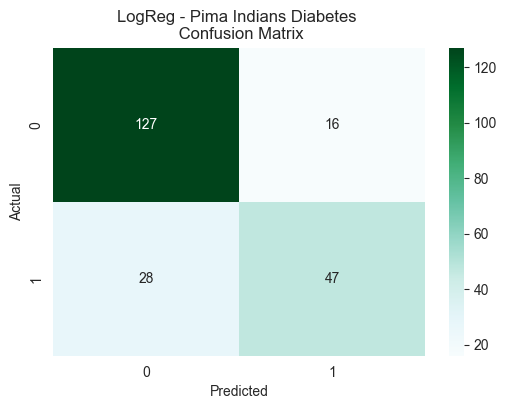

In [38]:
def confmatrix(predictions, title):
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='BuGn')  # Change the cmap to 'Blues' for a light color scheme
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Call the function with your predictions and title
confmatrix(logreg_pred, "LogReg - Pima Indians Diabetes \n Confusion Matrix")

**Cross-Validation**

In [39]:
### Perform 10-fold cross-validation
logreg_cv = np.mean(cross_val_score(logreg, X, y, cv=10) * 100)
print("10-Fold Cross-Validation score for KNN fit in Regular Training Set:", logreg_cv)

10-Fold Cross-Validation score for KNN fit in Regular Training Set: 75.82191780821918


The results of cross-validation for logistic regression is also good, which proves that the accuracy score got previously for this model was fine.

**Gaussian Naive Bayes**

--Build/Train the Model--

In [40]:
### Instantiate the Algorithm 
gnb = GaussianNB()

### Train the model
gnb.fit(X_train_scaled, y_train)

GaussianNB()

**Validate the model**

In [41]:
### Predict on the Test Set
gnb_pred = gnb.predict(X_test_scaled)

**Classification Report**

In [42]:
### Get performance metrics
gnb_score = metrics.accuracy_score(y_test, gnb_pred) * 100

### Print classification report
print("Classification report for {}:\n{}".format(gnb, metrics.classification_report(y_test, gnb_pred)))
print("Accuracy score:", gnb_score)

Classification report for GaussianNB():
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       143
           1       0.69      0.65      0.67        75

    accuracy                           0.78       218
   macro avg       0.76      0.75      0.75       218
weighted avg       0.78      0.78      0.78       218

Accuracy score: 77.98165137614679


This model also gave good accuracy score. Its recall score is better than that of LogReg.

**Confusion Matrix**

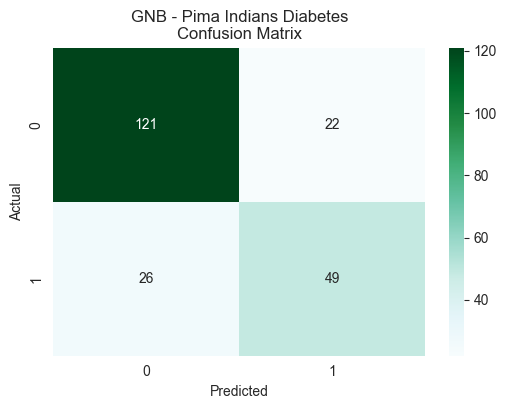

In [43]:
# Define the function to plot confusion matrix
def confmatrix(predictions, title):
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='BuGn')  # Change the cmap to 'Blues' for a light color scheme
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Call the function with your predictions and title
confmatrix(gnb_pred, "GNB - Pima Indians Diabetes\nConfusion Matrix")

**Cross-Validation**

In [44]:
### Perform cross-validation then get the mean
gnb_cv = np.mean(cross_val_score(gnb, X, y, cv=10) * 100)
print("10-Fold Cross-Validation score for KNN fit in Regular Training Set:", gnb_cv)

10-Fold Cross-Validation score for KNN fit in Regular Training Set: 75.01141552511415


**Random Forest Classifier**

    --Build/Train the Model--

In [45]:
### Instantiate algorithm
rf = RandomForestClassifier()

### Fit the model to the data
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

**Validate the model**

In [46]:
### Predict on the test set
rf_pred = rf.predict(X_test_scaled)

**Classification Report**

In [47]:
### Get performance metrics
rf_score = metrics.accuracy_score(y_test, rf_pred) * 100

### Print classification report
print("Classification report for {}:\n{}".format(rf, metrics.classification_report(y_test, rf_pred)))
print("Accuracy score:", rf_score)

Classification report for RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       143
           1       0.69      0.63      0.66        75

    accuracy                           0.78       218
   macro avg       0.75      0.74      0.75       218
weighted avg       0.77      0.78      0.77       218

Accuracy score: 77.52293577981652


This Random Forest model got a decent accuracy score but not as good as the logistic regression model. 

**Confusion Matrix**

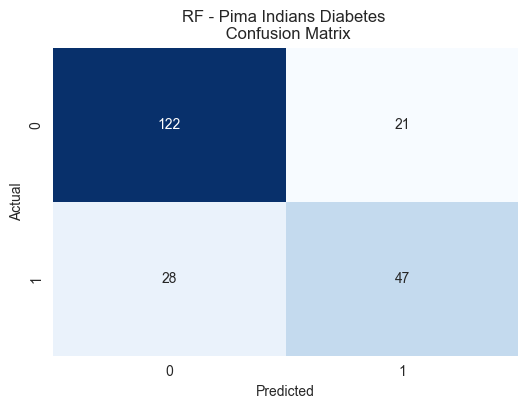

In [48]:
# Define the function to plot confusion matrix
def confmatrix(predictions, title):
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)  # Use a different cmap if needed
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Call the function with your predictions and title
rf_pred = rf.predict(X_test_scaled)
confmatrix(rf_pred, "RF - Pima Indians Diabetes \n Confusion Matrix")

**Cross validation**

In [49]:
### Perform cross-validation then get the mean
rf_cv = np.mean(cross_val_score(rf, X, y, cv=10) * 100)
print("10-Fold Cross-Validation score for KNN fit in Regular Training Set:", rf_cv)

10-Fold Cross-Validation score for KNN fit in Regular Training Set: 75.82762557077625


**K-Nearest Neighbors (KNN) Classifier**

   --Build/Train the Model:

In [50]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the algorithm
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

**Validate the model**

In [51]:
# Predict on the test set
knn_pred = knn.predict(X_test_scaled)

# Get performance metrics
knn_score = metrics.accuracy_score(y_test, knn_pred) * 100

# Print classification report
print("Classification report for {}:\n{}".format(knn, metrics.classification_report(y_test, knn_pred)))
print("Accuracy score:", knn_score)


Classification report for KNeighborsClassifier():
              precision    recall  f1-score   support

           0       0.78      0.85      0.82       143
           1       0.66      0.55      0.60        75

    accuracy                           0.75       218
   macro avg       0.72      0.70      0.71       218
weighted avg       0.74      0.75      0.74       218

Accuracy score: 74.77064220183486


**Confusion Matrix**

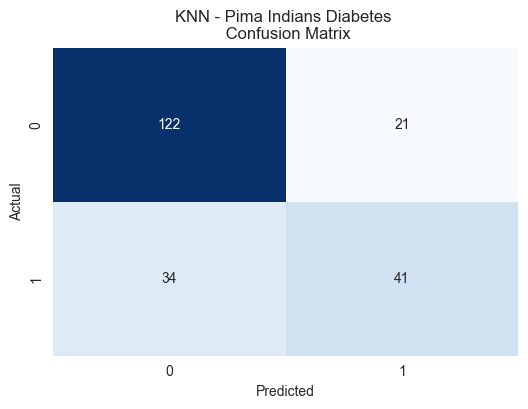

In [52]:
# Define the function to plot confusion matrix
def confmatrix(predictions, title):
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)  # Use a different cmap if needed
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

knn_pred = knn.predict(X_test_scaled)

# Plot the confusion matrix for KNN model predictions
confmatrix(knn_pred, "KNN - Pima Indians Diabetes \n Confusion Matrix")

**Cross_validation**

In [53]:
# Perform cross-validation then get the mean
knn_cv = np.mean(cross_val_score(knn, X, y, cv=10) * 100)
print("10-Fold Cross-Validation score for KNN fit in Regular Training Set:", knn_cv)


10-Fold Cross-Validation score for KNN fit in Regular Training Set: 71.13774733637747


**Decision Tree Classifier**

  --Build/Train the Model:

In [54]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the algorithm
dt = DecisionTreeClassifier()

# Train the model
dt.fit(X_train_scaled, y_train)


DecisionTreeClassifier()

**Validate the model**

In [55]:
# Predict on the test set
dt_pred = dt.predict(X_test_scaled)

# Get performance metrics
dt_score = metrics.accuracy_score(y_test, dt_pred) * 100

# Print classification report
print("Classification report for {}:\n{}".format(dt, metrics.classification_report(y_test, dt_pred)))
print("Accuracy score:", dt_score)


Classification report for DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.78      0.75      0.76       143
           1       0.55      0.59      0.57        75

    accuracy                           0.69       218
   macro avg       0.66      0.67      0.66       218
weighted avg       0.70      0.69      0.69       218

Accuracy score: 69.26605504587155


__Confusion Matrix__

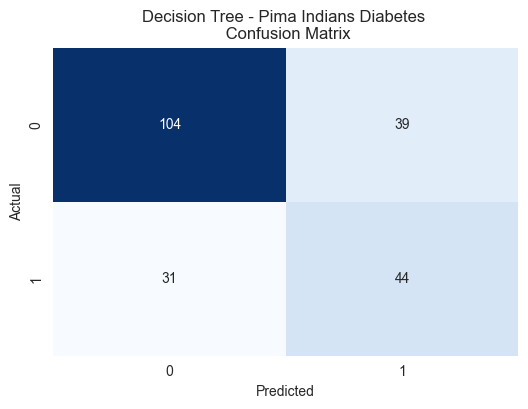

In [56]:
# Define the function to plot confusion matrix
def confmatrix(predictions, title):
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Initialize and train the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

# Make predictions
dt_pred = dt.predict(X_test_scaled)

# Plot the confusion matrix for Decision Tree model predictions
confmatrix(dt_pred, "Decision Tree - Pima Indians Diabetes \n Confusion Matrix")


**Cross-validation**

In [57]:
# Perform cross-validation then get the mean
dt_cv = np.mean(cross_val_score(dt, X, y, cv=10) * 100)
print("10-Fold Cross-Validation score for Decision Tree fit in Regular Training Set:", dt_cv)

10-Fold Cross-Validation score for Decision Tree fit in Regular Training Set: 70.0380517503805


**Summary of the results**

In [58]:
# Create a DataFrame to store the results
df_results = pd.DataFrame.from_dict({
    'Accuracy Score': {
        'Logistic Regression': logreg_score,
        'Gaussian Naive Bayes': gnb_score,
        'Random Forest': rf_score,
        'K-Nearest Neighbors (KNN)': knn_score,  
        'Decision Tree': dt_score  
    },
    'Cross-Validation Score': {
        'Logistic Regression': logreg_cv,
        'Gaussian Naive Bayes': gnb_cv,
        'Random Forest': rf_cv,
        'K-Nearest Neighbors (KNN)': knn_cv,  
        'Decision Tree': dt_cv  
    }
})

# Display the summary DataFrame
print(df_results)


                           Accuracy Score  Cross-Validation Score
Logistic Regression             79.816514               75.821918
Gaussian Naive Bayes            77.981651               75.011416
Random Forest                   77.522936               75.827626
K-Nearest Neighbors (KNN)       74.770642               71.137747
Decision Tree                   69.266055               70.038052


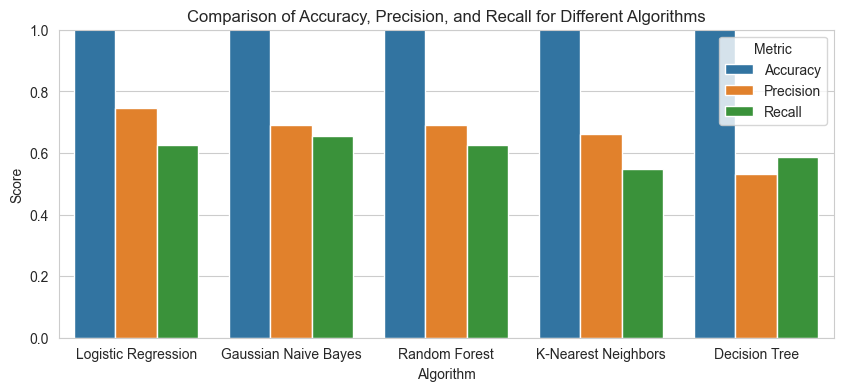

In [59]:
# Collect the results in a dictionary
results = {
    'Logistic Regression': {'Accuracy': logreg_score, 'Precision': metrics.precision_score(y_test, logreg_pred), 'Recall': metrics.recall_score(y_test, logreg_pred)},
    'Gaussian Naive Bayes': {'Accuracy': gnb_score, 'Precision': metrics.precision_score(y_test, gnb_pred), 'Recall': metrics.recall_score(y_test, gnb_pred)},
    'Random Forest': {'Accuracy': rf_score, 'Precision': metrics.precision_score(y_test, rf_pred), 'Recall': metrics.recall_score(y_test, rf_pred)},
    'K-Nearest Neighbors': {'Accuracy': knn_score, 'Precision': metrics.precision_score(y_test, knn_pred), 'Recall': metrics.recall_score(y_test, knn_pred)},
    'Decision Tree': {'Accuracy': dt_score, 'Precision': metrics.precision_score(y_test, dt_pred), 'Recall': metrics.recall_score(y_test, dt_pred)},
}

# Convert the results to a DataFrame
results_df = pd.DataFrame(results).T

# Reset index to get the algorithms as a column
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Algorithm'}, inplace=True)

# Melt the DataFrame for easier plotting
results_melted = results_df.melt(id_vars='Algorithm', var_name='Metric', value_name='Score')

# Plotting
plt.figure(figsize=(10, 4))
sns.barplot(data=results_melted, x='Algorithm', y='Score', hue='Metric')
plt.title('Comparison of Accuracy, Precision, and Recall for Different Algorithms')
plt.ylim(0, 1)  # Precision and Recall are in the range [0, 1], set y-limit to reflect this
plt.ylabel('Score')
plt.show()

<div style="background-color: lightblue; color: black; padding: 10px; border-radius: 5px;">
    <p>We got good accuracy scores from all of the models, but not that good precision and recall for classifying people with diabetes. One factor for this is the imbalance of data since more or less 65% of the subjects in the dataset have no diabetes. Also, there may be other predictors for diabetes that are not included in this dataset. So here I haven't used the techniques to treat the imbalanced data which is a future scope for me.</p>
    <p>Logistic Regression shows more promising results so I decide to choose this algorithm only. It also has good precision of 75%. The f1-score of this model is 80%.</p>
</div>


**I have made two different APIs and deployed them using Streamlit and here are the links for my APIs.**
 

 https://diabetes-project-internship-project-done.streamlit.app/ : This API has the diabeties dataset , dataset summary ,class distribution , Mean values by outcome. 

https://diabetesfinalprediction.streamlit.app/  : This is the HealthReportAnalyzer API which offers disease prediction models for users.
Users choose disease prediction options like diabetes.
It provides a simple interface for inputting health data and accurate disease outcome predictions.
And for this i have considered all the features so as to get better prediction results and also ensured/checked for few of the test cases(for example - value beyond a certain range for that particular feature then that fill up will show the error and will ask for the coreect or values within that particular range).

In [60]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = logreg.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.29415229  1.44023374 -0.0024577  -1.01409292  0.7605863  -0.99441344
   0.31550084  1.42723571]]
[1]
The person is diabetic
